In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
import itertools

# Functions

In [70]:
# Get TC;

# AV:       arrival vector;
# IV:       interval vector;
# duration: duration vector;
# idx:      value position in vectors to use;
# n:        number of samples in TC;

def generate_tc(av, iv, dur, idx, n):
    _N = n
    _arrival = av[idx]  # Arrival of first batch;
    _increment = iv[idx]  # Interval to future batch;
    _duration = dur[idx]  # Duration of ones;
    
    x_axis = list(range(0, _N))  # Sample number range;
    y_axis = []  # Sample values;
    
    # Get positions of batches and end of ones;
    _batches = [_arrival + (_increment * x) for x in range(1, int((_N-_arrival)/_increment)+1)]
    _ones_ends = [n + _duration for n in _batches]                                                                                                   
    
    # Fill pre-arrival zeros;
    for i in range(0, _arrival):
        y_axis.append(0)
        
    # Fill batches;
    _val = 1
    for i in range(_arrival, _N):
        # Get start of each batch;
        if (i in _batches):
            #print("batch start: " + str(i))
            _val = 1
        # Get end of ones;
        if (i == _arrival + _duration or i in _ones_ends):
            #print("ones end: " + str(i))
            _val = 0
        y_axis.append(_val)

    tc = y_axis
    return tc

In [3]:
# Get list of TCs;

# AV:       arrival vector;
# IV:       interval vector;
# duration: duration vector;
# total:    number of TCs to make (i.e. length of vectors);
# n:        number of samples in each TC;

def get_tcs(AV, IV, duration, total, n):  
    tc_list = []  
    for i in range(0, total):
        _tc = generate_tc(AV, IV, duration, i, n)
        tc_list.append(_tc)     
    return tc_list

In [76]:
# Standardize TC;

# tc: TC input;

def standardize_tc(tc):
    _values = tc
    _values_standardized = (_values - np.mean(_values)) / np.std(_values)
    return _values

# Construct TC

In [77]:
AV = [0,20,0,0,0,0]
IV = [30,45,60,40,40,40]
duration = [15,20,25,15,20,25]

In [78]:
tcs = get_tcs(AV, IV, duration, 6, 240)

In [79]:
# Standardize all TCs

tcs_standardized = []
for tc in tcs:
    tc_standardized = standardize_tc(tc)
    tcs_standardized.append(tc_standardized)

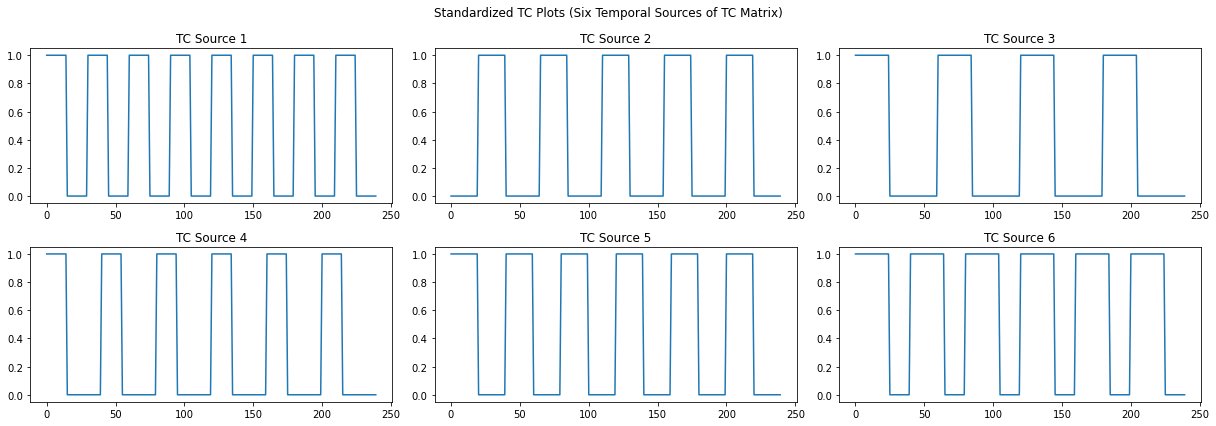

In [82]:
# Plot all 6 standardized TCs;

fig, axes = plt.subplots(2, 3, figsize=(17,6))

fig.suptitle('Standardized TC Plots (Six Temporal Sources of TC Matrix)')

for i in range(0, 2):
    for j in range(0, 3):
        idx = i+j
        if(i!=0):
            idx += i+1
            
        tc = tcs_standardized[idx]
        sns.lineplot(ax=axes[i,j], data=tc)
        axes[i, j].set_title("TC Source " + str(idx+1))
        
fig.tight_layout()
plt.show()

In [87]:
# Construct matrix TC;

TC = []

for tc_s in tcs_standardized:
    values = tc_s
    TC.append(values)

In [88]:
TC_df = pd.DataFrame(TC).T

In [89]:
TC_corr = TC_df.corr()

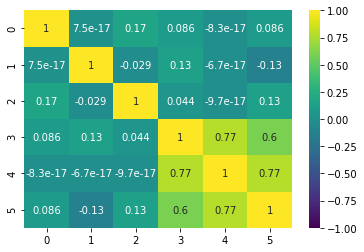

In [90]:
# Correlation heatmap;
fig = sns.heatmap(TC_corr, annot=True, 
                  vmin=-1, vmax=1, center=0, cmap="viridis")
plt.show()

In [26]:
# TCs 3, 4, 5 are highly correlated;

# Construct tmpSM Array

In [27]:
# Create tmpSM array of six 21x21 SMs;
# For each SM, put ones at specified (vertical, horizontal) positions;

# Define ranges;
ones_ranges = [
    ((2,6),(2,6)),
    ((2,6),(15,19)),
    ((8,13),(2,6)),
    ((8,13),(15,19)),
    ((15,19),(2,6)),
    ((15,19),(15,19))]

# Initialize tmpSM;
initSM = []
for n in range(0,6):
    sm = np.zeros((21, 21))
    ranges = ones_ranges[n]
    vertical_range = range(ranges[0][0]-1, ranges[0][1])
    horizontal_range = range(ranges[1][0]-1, ranges[1][1])
    
    for i in vertical_range:
        for j in horizontal_range:
            sm[i][j] = 1
    
    initSM.append(sm)

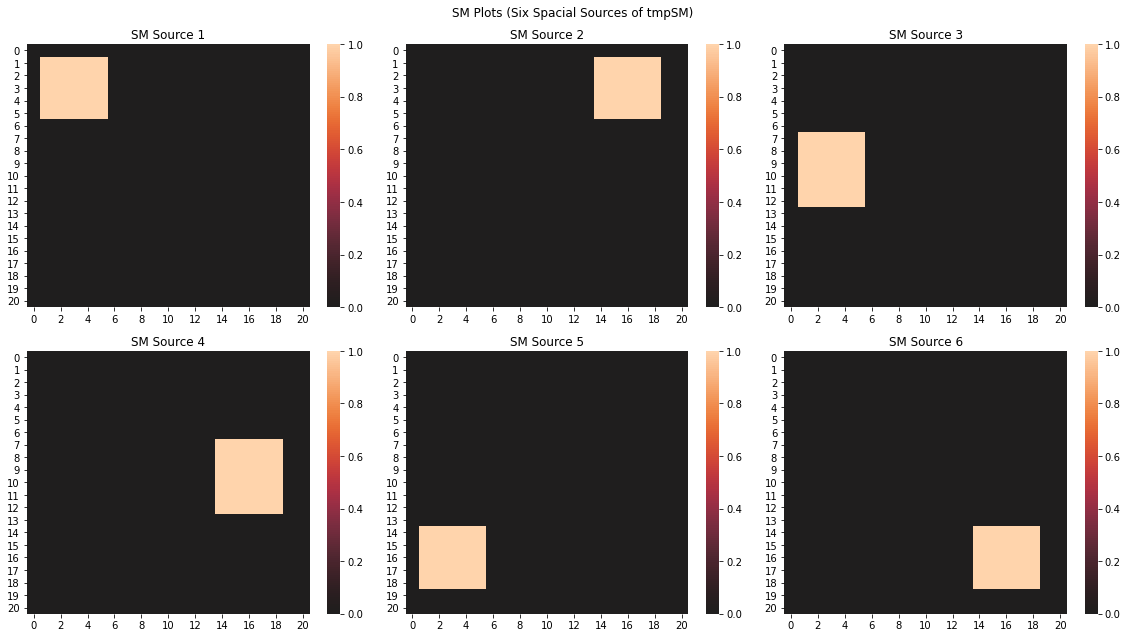

In [67]:
# Plot each SM;

tmpSM = initSM

fig, axes = plt.subplots(2, 3, figsize=(16,9))

fig.suptitle('SM Plots (Six Spacial Sources of tmpSM)')

for i in range(0, 2):
    for j in range(0, 3):
        idx = i+j
        if(i!=0):
            idx += i+1
        sm = tmpSM[idx]
        sns.heatmap(data=sm, center=0, ax=axes[i,j])
        axes[i, j].set_title("SM Source " + str(idx+1))
        
fig.tight_layout()
plt.show()

In [29]:
# Reshape into 6 * 441 array;

SM = np.stack(tmpSM, axis=0)
SM = SM.reshape(6,441)

In [30]:
SM_df = pd.DataFrame(SM)

In [39]:
SM_corr = SM_df.T.corr()

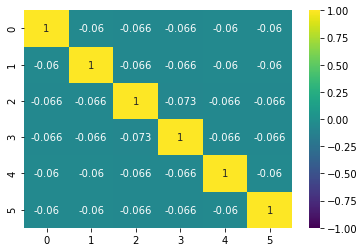

In [40]:
# Correlation heatmap;
fig = sns.heatmap(SM_corr, annot=True, 
                  vmin=-1, vmax=1, center=0, cmap="viridis")
plt.show()

# Generate Zero Mean White Gaussian Noise

In [41]:
noise = np.random.normal(0,0.25,100)

In [62]:
# Noise for TC: 240 rows * 6 columns;
noise_t= [np.random.normal(0,0.25,6) for i in range(0,240)]
noise_t = pd.DataFrame(noise_t)

# Noise for SM: 6 rows * 441 columns;
noise_s = [np.random.normal(0,0.015,441) for i in range(0,6)]
noise_s = pd.DataFrame(noise_s)

In [63]:
noise_t_corr = noise_t.corr()
noise_s_corr = noise_s.T.corr()

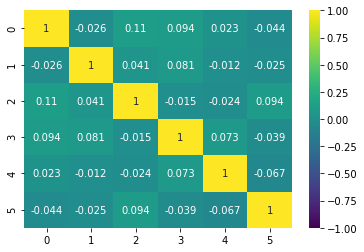

In [64]:
# Correlation heatmap for noise t;
fig = sns.heatmap(noise_t_corr, annot=True, 
                  vmin=-1, vmax=1, center=0, cmap="viridis")
plt.show()

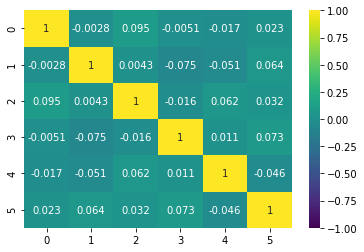

In [65]:
# Correlation heatmap for noise s;
fig = sns.heatmap(noise_s_corr, annot=True, 
                  vmin=-1, vmax=1, center=0, cmap="viridis")
plt.show()